In [142]:
# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [143]:
df_cleaned = pd.read_csv('cleaned_data.csv')

In [144]:
df_cleaned.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order,Month,Day,Ocean_Sea
0,2024-09-16,2024,Unprovoked,morocco,Southern Morocco,West Of Dakhla,Swimming Jumped Off Yacht,German Tourist,F,28,Leg severed,Afternoon,White Shark,Andy Currie: Moroccan World News: Sky News,undefined,9,16,Atlantic Ocean
1,2024-08-26,2024,Unprovoked,jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,28,Head right arm and leg severed,Afternoon,Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,undefined,8,26,Caribbean Sea
2,2024-08-06,2024,Unprovoked,belize,Gulf Of Honduras,Central America,Swimming Diving,Annabelle Carlson,F,28,Right lower leg amputated after serious bite,Morning,Reef shark 6ft (1.8m),Kevin McMurray Tracking Sharks.com New York Po...,undefined,8,6,Caribbean Sea
3,2024-07-23,2024,Unprovoked,australia,Nsw,"North Shore Beach, Port Macquarie",Surfing,Kai McKenzie,M,28,Serious injury to leg,Morning,White Shark,Nine.com.au: ABC.Net.Au Johannes Marchand,undefined,7,23,Indian Ocean and Pacific Ocean
4,2024-07-18,2024,Unprovoked,australia,Western Australia,Trigg Beach Sterling,Surfing,Ryan Lowther,M,28,Minor injury to lower left leg,Afternoon,Undetermined small shall shark,Daily Mail: Sky News: The West Australian,undefined,7,18,Indian Ocean and Pacific Ocean


### Summary Statistics

In [145]:
# Display statistical age
df_cleaned['Age'].describe().round(2)

count    5178.00
mean       28.07
std         7.75
min         3.00
25%        28.00
50%        28.00
75%        28.00
max        87.00
Name: Age, dtype: float64

In [146]:
df_cleaned.describe(include=["O"])

,Date,Type,Country,State,Location,Activity,Name,Sex,Injury,Time,Species,Source,original order,Ocean_Sea
count,5178,5178,5178,5178,5177,5178,5178,5178,5177,5178,5178,5178,5178,5178
unique,4494,6,104,608,3467,1088,4395,2,2956,3,580,4054,5027,25
top,1960-01-01,Unprovoked,usa,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Fatal,Afternoon,undefined,"K. McMurray, TrackingSharks.com",undefined,Atlantic Ocean and Pacific Ocean
freq,9,4311,2122,1235,478,1233,513,4523,671,3670,2506,119,151,2122


In [147]:
# Show the information of the dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            5178 non-null   object
 1   Year            5178 non-null   int64 
 2   Type            5178 non-null   object
 3   Country         5178 non-null   object
 4   State           5178 non-null   object
 5   Location        5177 non-null   object
 6   Activity        5178 non-null   object
 7   Name            5178 non-null   object
 8   Sex             5178 non-null   object
 9   Age             5178 non-null   int64 
 10  Injury          5177 non-null   object
 11  Time            5178 non-null   object
 12  Species         5178 non-null   object
 13  Source          5178 non-null   object
 14  original order  5178 non-null   object
 15  Month           5178 non-null   int64 
 16  Day             5178 non-null   int64 
 17  Ocean_Sea       5178 non-null   object
dtypes: int64

### Visualizations

#### For numerical continuous variables

In [148]:
sns.set_style('whitegrid')

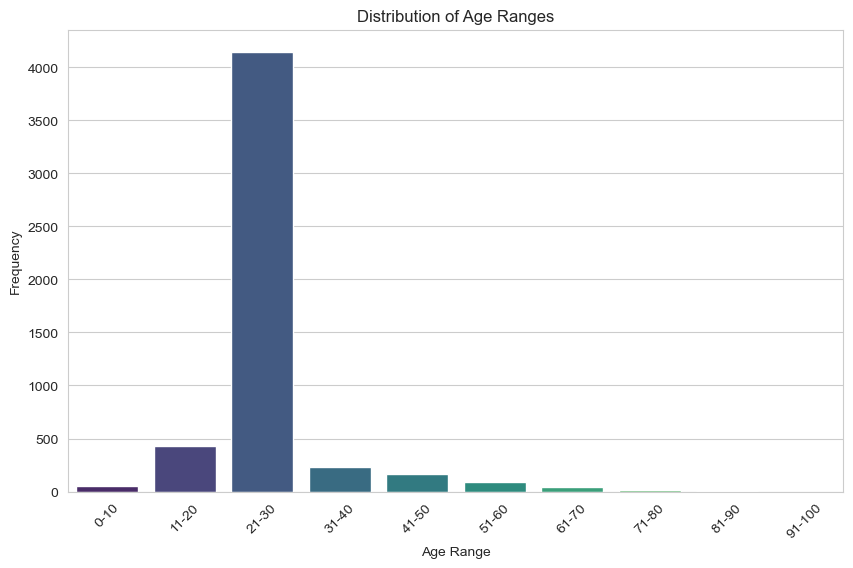

In [149]:
# Plot 1: Distribution the ages
# Crear rangos de edades
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_cleaned['AgeRange'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Graficar la distribución de los rangos de edades
plt.figure(figsize=(10,6))
sns.countplot(x='AgeRange', data=df_cleaned, palette='viridis')
plt.title('Distribution of Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

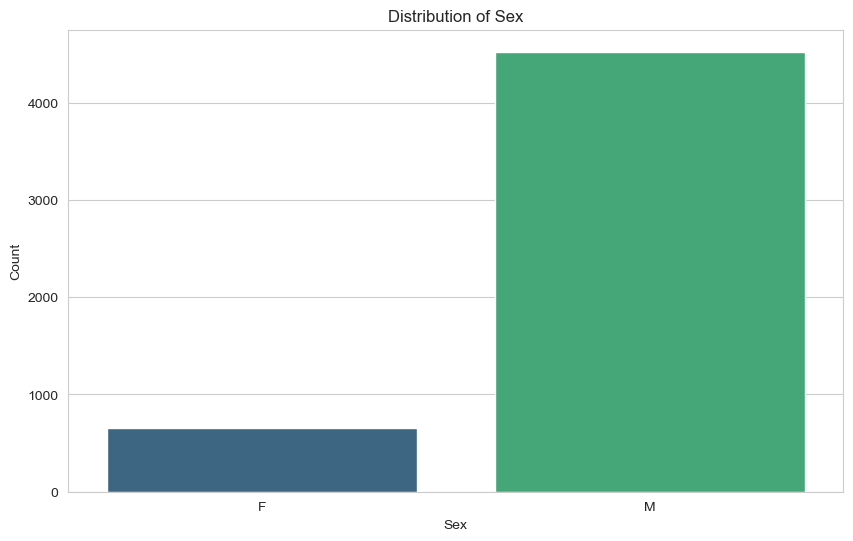

In [150]:
# Plot 2: Countplot del Sexo
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', data=df_cleaned, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

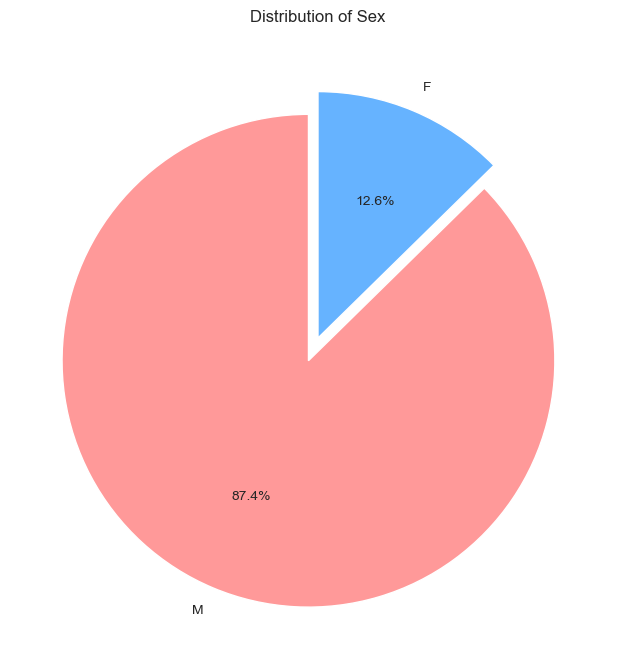

In [151]:
# Plot 3: Pie Chart del Sexo
plt.figure(figsize=(8,8))
df_cleaned['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.1, 0))
plt.title('Distribution of Sex')
plt.ylabel('') 
plt.show()

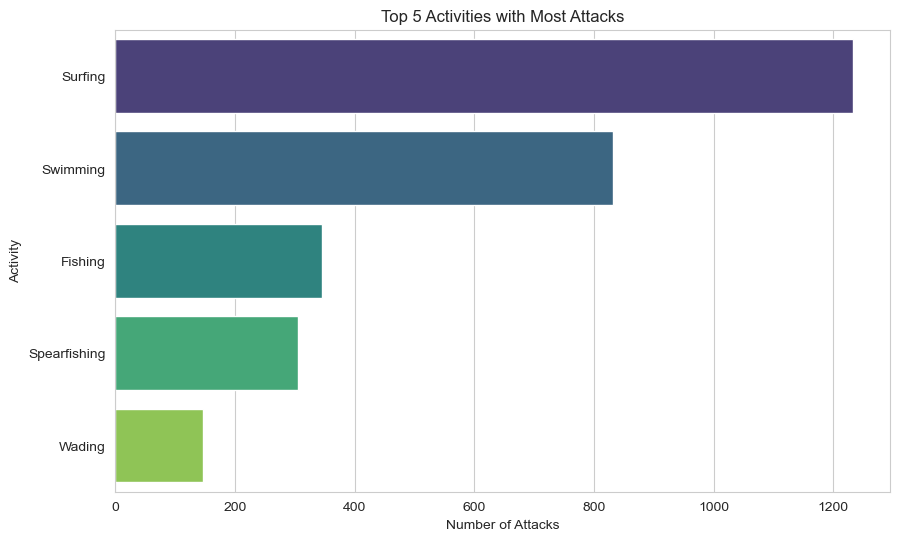

In [152]:
# Plot 4: Activities with Most Attacks
# Paso 1: Agrupar los datos por actividad y contar los ataques
activity_counts = df_cleaned['Activity'].value_counts()

# Paso 2: Seleccionar las 5 actividades con más ataques
top_5_activities = activity_counts.head(5)

# Paso 3: Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_activities.values, y=top_5_activities.index, palette='viridis')
plt.title('Top 5 Activities with Most Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Activity')
plt.show()

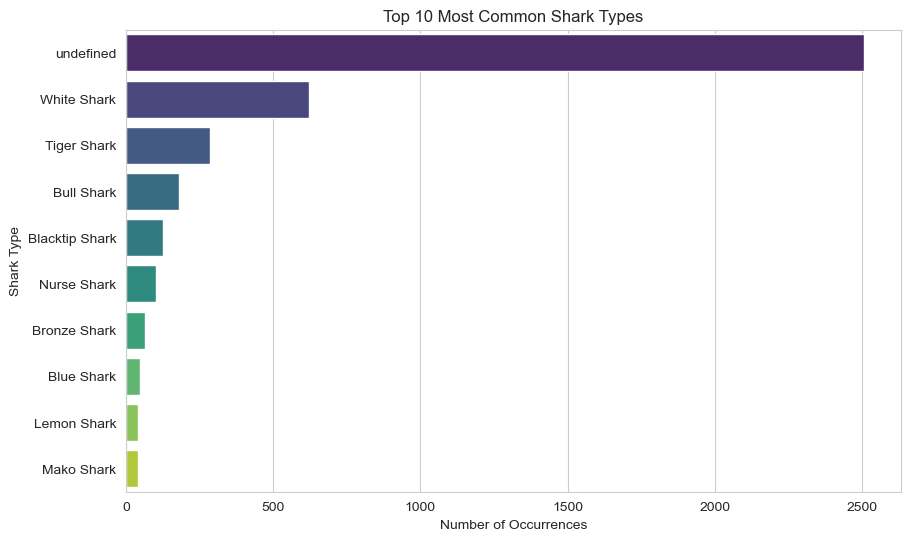

In [153]:
# Plot 5: Top 10 Most Common Shark Types
# Paso 1: Agrupar los datos por tipo de tiburón y contar las ocurrencias
shark_counts = df_cleaned['Species'].value_counts()

# Paso 2: Seleccionar los 10 tipos de tiburones más comunes
top_5_sharks = shark_counts.head(10)

# Paso 3: Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_sharks.values, y=top_5_sharks.index, palette='viridis')
plt.title('Top 10 Most Common Shark Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Shark Type')
plt.show()

In [154]:
# Valores únicos de la columna Ocean_Sea
df_cleaned['Ocean_Sea'].unique()

array(['Atlantic Ocean', 'Caribbean Sea',
       'Indian Ocean and Pacific Ocean',
       'Atlantic Ocean and Pacific Ocean', 'Indian Ocean',
       'Pacific Ocean', 'Atlantic Ocean and Indian Ocean',
       'Pacific Ocean and Gulf of Mexico', 'Red Sea',
       'Atlantic Ocean and Mediterranean Sea',
       'Pacific Ocean and Caribbean Sea', 'Indian Ocean and Andaman Sea',
       'Atlantic Ocean, Pacific Ocean, and Arctic Ocean',
       'Mediterranean Sea', 'Indian Ocean and South China Sea',
       'Persian Gulf', 'Red Sea and Persian Gulf',
       'Arctic Ocean and Pacific Ocean', 'South China Sea',
       'Adriatic Sea', 'Atlantic Ocean and Arctic Ocean',
       'Persian Gulf and Caspian Sea', 'Mediterranean Sea and Black Sea',
       'Red Sea and Gulf of Aden', 'Baltic Sea'], dtype=object)

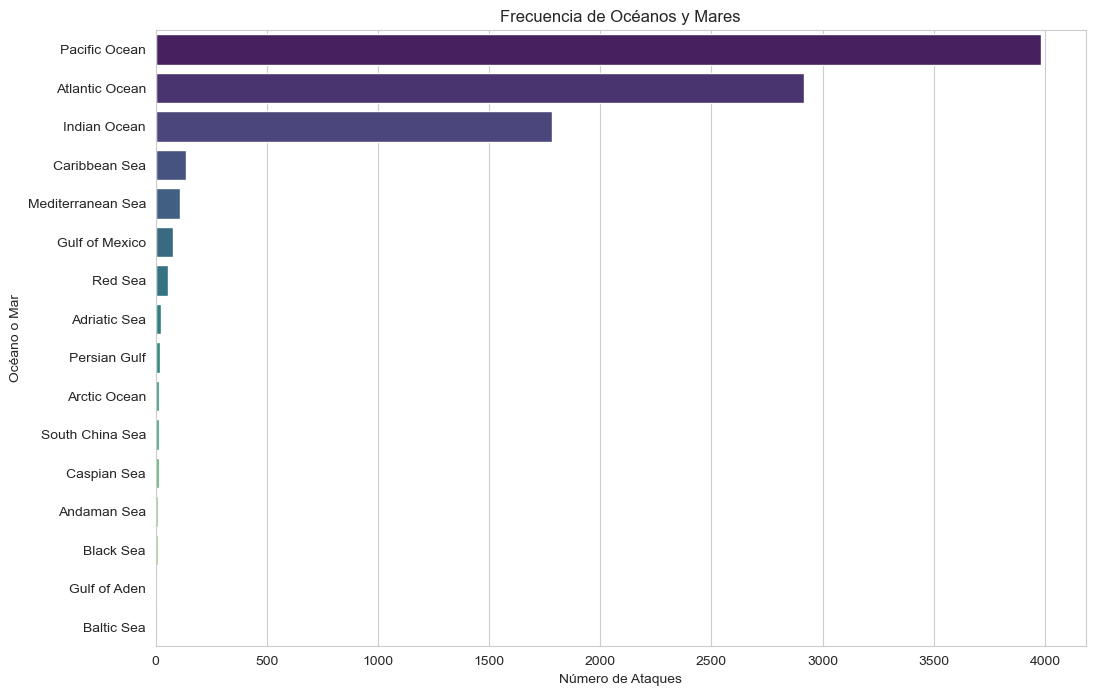

In [155]:
# Plot 6: Countplot de los Océanos
# Paso 1: Asegurarse de que todos los valores en 'Ocean_Sea' sean cadenas de texto y no nulos
df_cleaned['Ocean_Sea'] = df_cleaned['Ocean_Sea'].astype(str).fillna('')

# Paso 2: Reemplazar comas con 'and'
df_cleaned['Ocean_Sea'] = df_cleaned['Ocean_Sea'].str.replace(', ', ' and ')

# Paso 3: Separar las combinaciones de océanos y mares
df_cleaned['Ocean_Sea'] = df_cleaned['Ocean_Sea'].str.split(' and ')
df_exploded = df_cleaned.explode('Ocean_Sea')

# Paso 4: Eliminar espacios en blanco adicionales y la palabra 'and'
df_exploded['Ocean_Sea'] = df_exploded['Ocean_Sea'].str.strip()
df_exploded['Ocean_Sea'] = df_exploded['Ocean_Sea'].str.replace('and', '', regex=False).str.strip()

# Paso 5: Contar la frecuencia de cada océano o mar
ocean_counts = df_exploded['Ocean_Sea'].value_counts()

# Paso 6: Crear el gráfico de barras horizontal
plt.figure(figsize=(12,8))
sns.barplot(y=ocean_counts.index, x=ocean_counts.values, palette='viridis', orient='h')
plt.title('Frecuencia de Océanos y Mares')
plt.xlabel('Número de Ataques')
plt.ylabel('Océano o Mar')
plt.xticks(rotation=0)
plt.show()

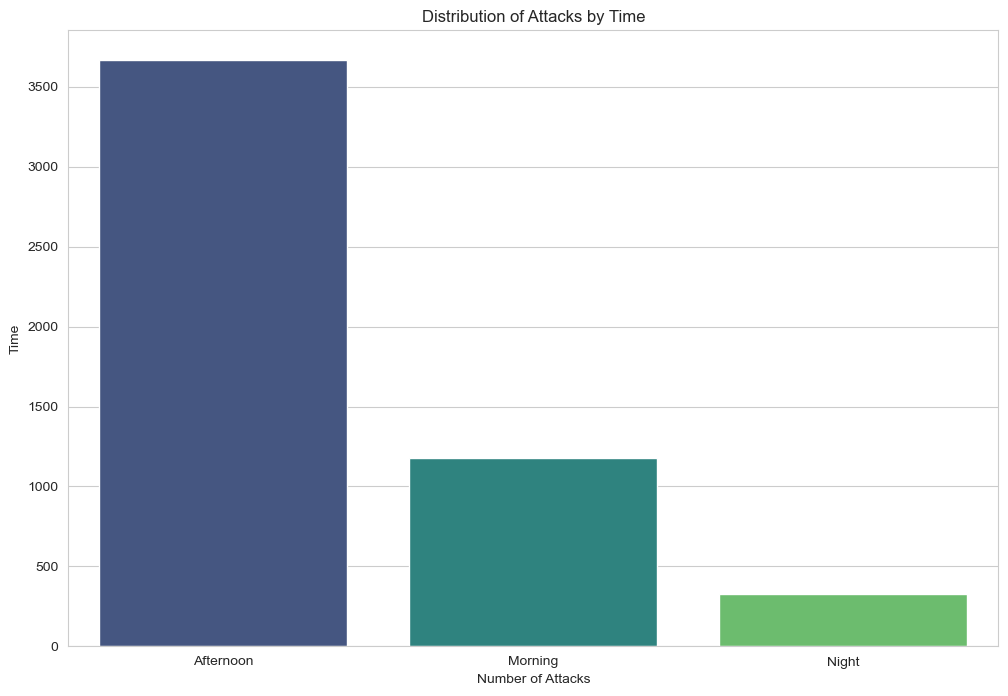

In [156]:
# Plot 7: Distribution of Countries
# Paso 2: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.countplot(x='Time', data=df_cleaned, palette='viridis', order=df_cleaned['Time'].value_counts().index)
plt.title('Distribution of Attacks by Time')
plt.xlabel('Number of Attacks')
plt.ylabel('Time')
plt.show()

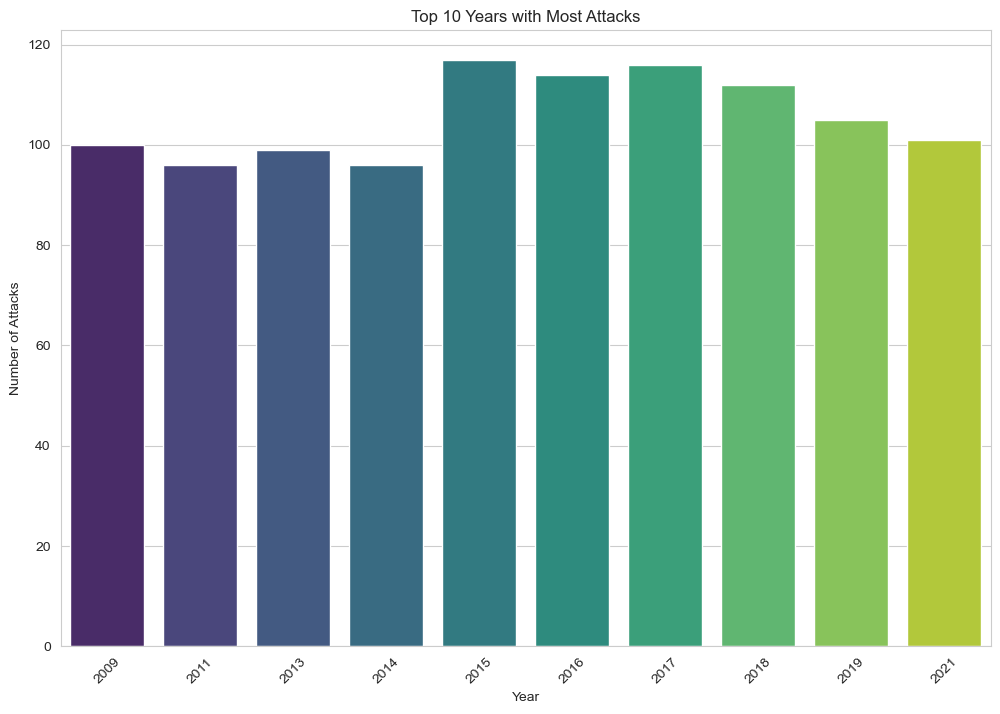

In [157]:
# Plot 8: Top 10 Years with Most Attacks
# Paso 1: Convertir la columna 'Date' a formato de fecha y extraer el año
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Paso 2: Contar el número de ataques por año
year_counts = df_cleaned['Year'].value_counts()

# Paso 3: Seleccionar los 10 años con más ataques
top_10_years = year_counts.head(10)

# Paso 4: Ordenar los valores 
top_10_years = top_10_years.sort_values(ascending=False)

# Paso 5: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='viridis')
plt.title('Top 10 Years with Most Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

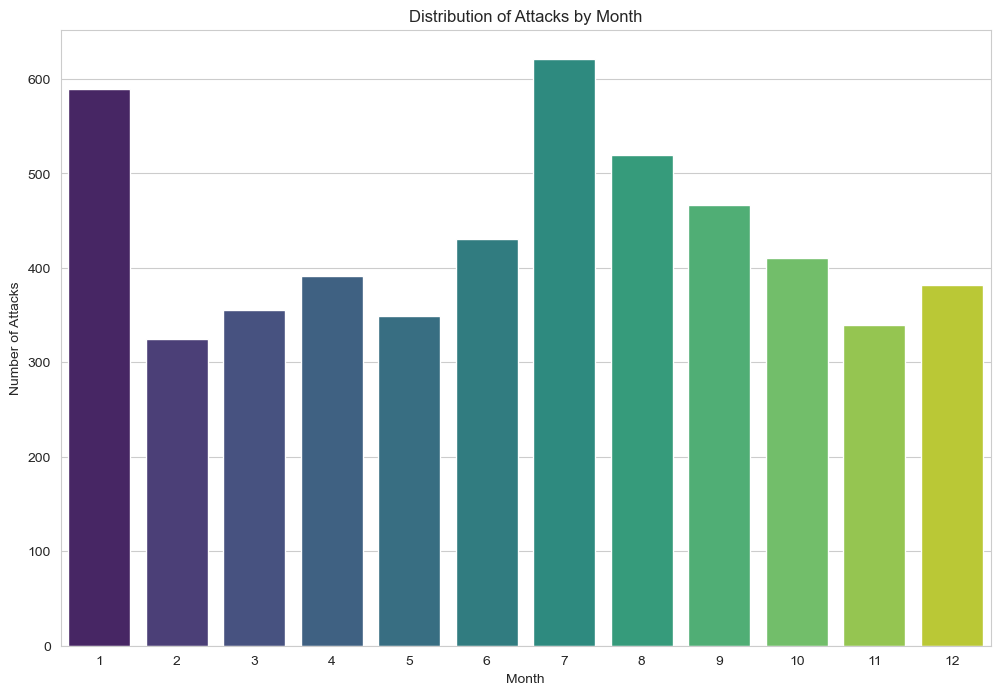

In [158]:
# Plot 9: Distribution of Attacks by Month
# Paso 1: Convertir la columna 'Date' a formato de fecha y extraer el mes
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Paso 2: Contar el número de ataques por mes
month_counts = df_cleaned['Month'].value_counts().sort_index()

# Paso 3: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Distribution of Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

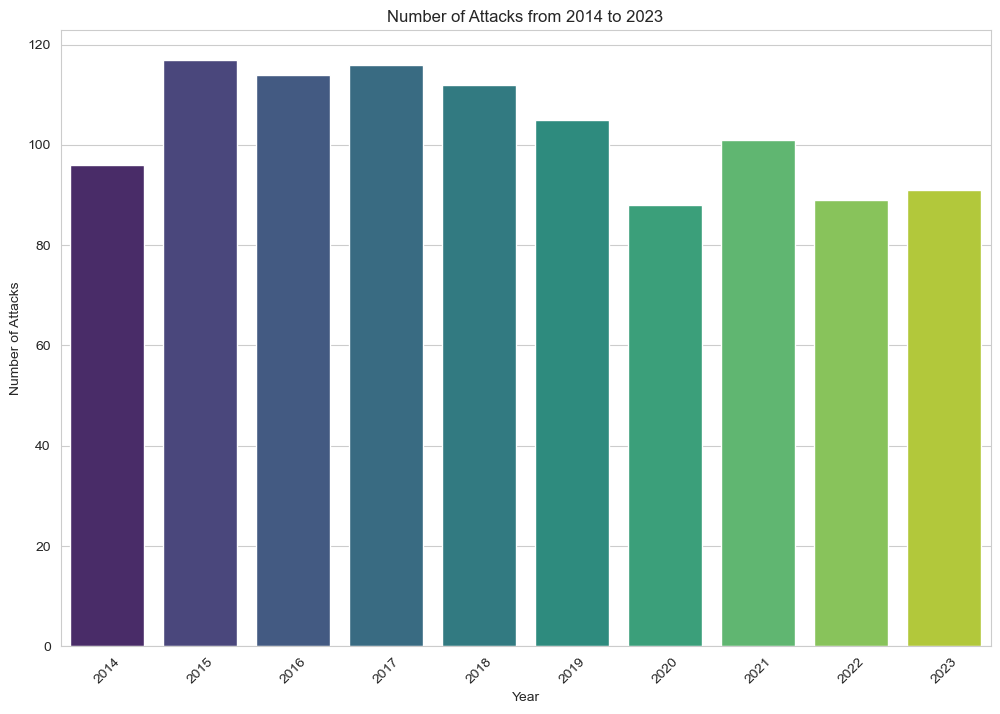

In [159]:
# Number of Attacks in the Last 10 Years
# Paso 1: Convertir la columna 'Date' a formato de fecha y extraer el año
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Paso 2: Filtrar los datos para los años 2014 a 2023
filtered_years = df_cleaned[(df_cleaned['Year'] >= 2014) & (df_cleaned['Year'] <= 2023)]

# Paso 3: Contar el número de ataques por año en el rango filtrado
year_counts = filtered_years['Year'].value_counts().sort_index()

# Paso 4: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Attacks from 2014 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

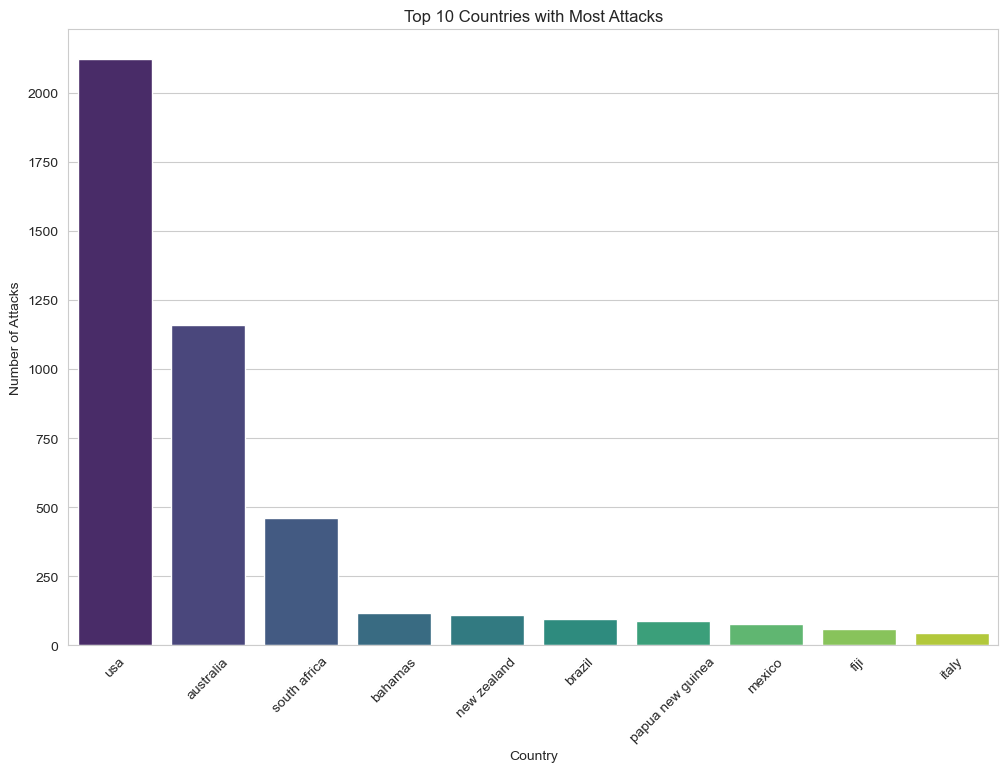

In [160]:
# Plot 10: Top 10 Countries with Most Attacks
# Paso 1: Contar la frecuencia de ataques por país
country_counts = df_cleaned['Country'].value_counts().head(10)

# Paso 2: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries with Most Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

#### Relationshsip between variables

In [161]:
df_cleaned.groupby(['Sex', 'Ocean_Sea']).agg({'Age': 'mean'})

TypeError: unhashable type: 'list'

In [22]:
df_cleaned.groupby(['Sex', 'Ocean_Sea']).agg({'Type': 'count'})

Type
Sex Ocean_Sea                                            
F   Adriatic Sea                                        8
    Atlantic Ocean                                     33
    Atlantic Ocean and Indian Ocean                    22
    Atlantic Ocean and Mediterranean Sea               10
    Atlantic Ocean and Pacific Ocean                  363
    Atlantic Ocean, Pacific Ocean, and Arctic Ocean     2
    Caribbean Sea                                       7
    Indian Ocean                                       10
    Indian Ocean and Andaman Sea                        1
    Indian Ocean and Pacific Ocean                     98
    Indian Ocean and South China Sea                    2
    Mediterranean Sea                                   4
    Pacific Ocean                                      59
    Pacific Ocean and Caribbean Sea                     4
    Pacific Ocean and Gulf of Mexico                   11
    Persian Gulf and Caspian Sea                        1
    Red Sea                                            15
    Red Sea and Gulf of Aden                            1
    South China Sea                                     4
M   Adriatic Sea                                       15
    Arctic Ocean and Pacific Ocean                      4
    Atlantic Ocean                                    251
    Atlantic Ocean and Arctic Ocean                     1
    Atlantic Ocean and Indian Ocean                   438
    Atlantic Ocean and Mediterranean Sea               28
    Atlantic Ocean and Pacific Ocean                 1759
    Atlantic Ocean, Pacific Ocean, and Arctic Ocean    10
    Baltic Sea                                          1
    Caribbean Sea                                      78
    Indian Ocean                                      121
    Indian Ocean and Andaman Sea                       10
    Indian Ocean and Pacific Ocean                   1078
    Indian Ocean and South China Sea                    1
    Mediterranean Sea                                  58
    Mediterranean Sea and Black Sea                     9
    Pacific Ocean                                     482
    Pacific Ocean and Caribbean Sea                    46
    Pacific Ocean and Gulf of Mexico                   68
    Persian Gulf                                        3
    Persian Gulf and Caspian Sea                       13
    Red Sea                                            33
    Red Sea and Gulf of Aden                            4
    Red Sea and Persian Gulf                            2
    South China Sea                                    10

In [29]:
import plotly.express as px
import pandas as pd


# Import data from USGS
#data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')


# Drop rows with missing or invalid values in the 'mag' column
#data = data.dropna(subset=['mag'])
#data = data[data.mag >= 0]


# Create scatter map
fig = px.scatter_geo(df_cleaned,
                     hover_name='Country', #size='mag',
                     title='Earthquakes Around the World')
fig.show()